In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# **Linear Regression Assignment: BoomBikes**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

The problem would be solved by following below steps.
  1. Reading and Understanding the data
  2. Visualising the Data 
  3. Performing Simple Linear Regression
  4. Residual analysis
  5. Predictions on the Test Set





#### **Problem Statement**
A US bike sharing provider **BoomBikes** have suffered considerable dips in revenue due to the COVID-19 pandemic. They are looking to mindful business plan so they could accelerate the revenue as soon as economy restores to healthy state.

The business plan is to understand the factors/features on which the demand of shared bike depends.
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Business Goal:**  
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# **1: Reading and understanding the Data**

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

from math import sqrt


In [5]:
# Read the data using pandas
#BoomBikes = pd.read_csv('/content/drive/MyDrive/Data_Science/Linear Regression Assignment/day.csv')
BoomBikes = pd.read_csv('day.csv')

In [6]:
# Understand the data looking at the top 5 rows
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Check for information of the dataset.
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Here the `dteday` has object datatype. It should be datetime datatype.
- There are no missing values in the dataset.

In [8]:
# Statistical Summary
BoomBikes.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


##### **Exploratory Data Analysis**

- AS per the data dictionary, the `instant` variable is kind of index column.So we can drop `instant` variable here.
- As mentioned in the problem statement the `causual` and `registered` variables can be droped and both these variables are explaining the same thing as `cnt`. Here `cnt` is our target variable.

In [9]:
BoomBikes.drop(["instant",'casual','registered'], axis=1, inplace=True)
BoomBikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# checking for the data information
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


# **2: Data Visualization**

**Numerical variable analysis**

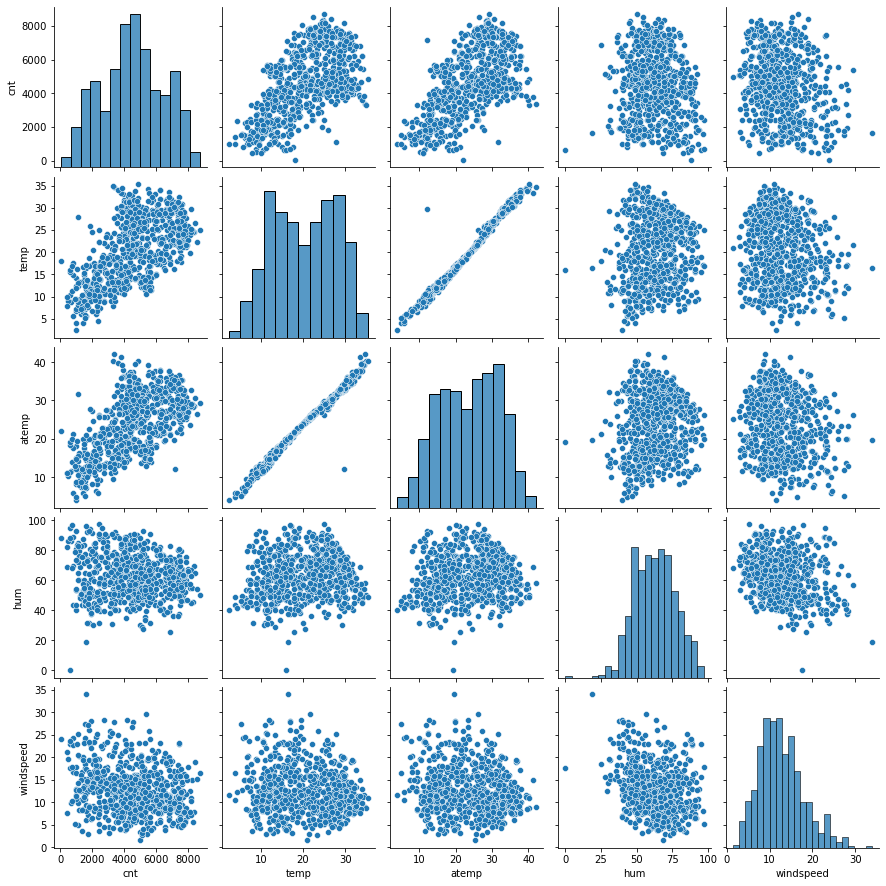

In [11]:
# Create numerical variable list
numvars = ['cnt','temp', "atemp","hum","windspeed"]

# Pairplot for all numeric avariables
sns.pairplot(data=BoomBikes,vars = numvars)
plt.show()

- Looking at the pairplot we can see the linear relationship with `temp` and `atemp`.
- The target variable `cnt` is normally distributed.
- So can consider linear regression model for this problem statement as few variable have linear relation.

**Categorical Variable analysis**

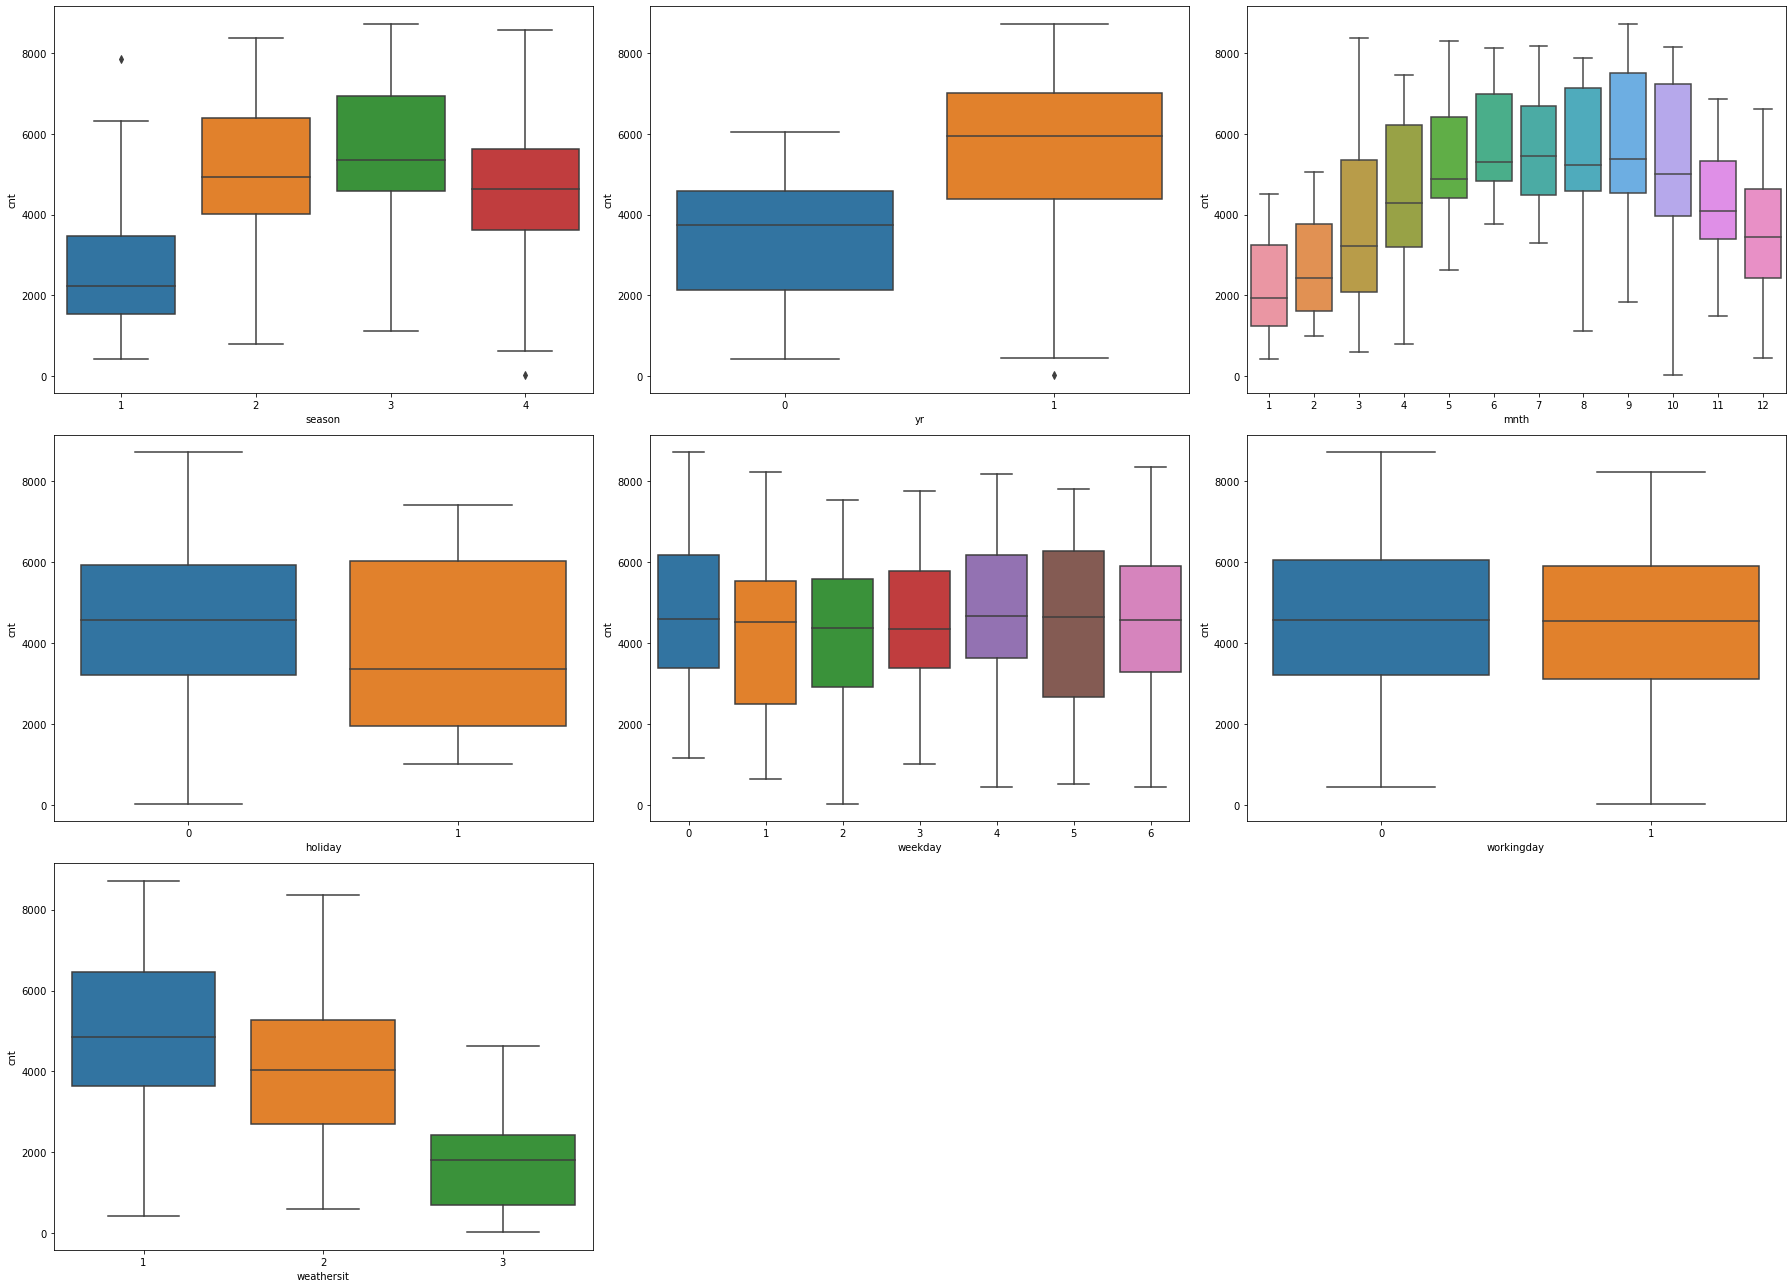

In [12]:
# Create list of categorical variable list.
catvars = ['season',"yr",'mnth','holiday','weekday','workingday','weathersit']

#Box plot 
fig = plt.figure(figsize=(25,18))
i = 1
for vars in catvars:
  plt.subplot(3,3,i)
  sns.boxplot(data = BoomBikes, x = vars, y = 'cnt')
  i = i + 1

fig.tight_layout()
plt.show()

- Demand is high in summer and fall season.
- Demand has increased in year 2019.
- The demand in least in the month of January. And it increases till October, then starts decreasing.
- High demand on non-holiday.
- Demand is same over the entire week.
- Demand is higher when weather is clear, few clouds.

# **3.Data Preparation**

In [13]:
# Dropping the unncessory columns fom the dataset.
# Date variable can be droped as we have month and year data available in dataset.
BoomBikes.drop("dteday", axis = 1, inplace=True) 
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Converting the numeriacal values to categorical values.

BoomBikes['mnth'] = BoomBikes['mnth'].map({1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

BoomBikes["season"] = BoomBikes['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

BoomBikes["weekday"] = BoomBikes["weekday"].map({0:'Sun',1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

BoomBikes['weathersit'] = BoomBikes['weathersit'].map({1:"Clear + Few Cloudy", 2:"Mist + Cloudy",3:"Light Snow + Light Rain",4:"Heavy Rain"})

In [15]:
# New datafame
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear + Few Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear + Few Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear + Few Cloudy,9.305237,11.46350,43.6957,12.522300,1600


##### **Dummy Variables**

In [16]:
# Creating dummy variables for the categorical variables
months =  pd.get_dummies(BoomBikes['mnth'], drop_first=True)
seasons = pd.get_dummies(BoomBikes['season'], drop_first=True)
weekdays = pd.get_dummies(BoomBikes['weekday'], drop_first=True)
weathersits = pd.get_dummies(BoomBikes['weathersit'], drop_first=True)


In [17]:
# Concatenating the dummy_vars dataframe to original dataframe
BoomBikes = pd.concat([BoomBikes,months,seasons,weekdays,weathersits],axis=1)
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear + Few Cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear + Few Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear + Few Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Drop all variables as we have created the dummies for those columns
BoomBikes.drop(['mnth','season','weekday','weathersit'],axis=1, inplace=True)
BoomBikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# dimensions of the new datasets
BoomBikes.shape

(730, 30)

# **4: Splitting data into Training and Testing Datasets**

In [20]:
# splitting the dataset

np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# dimensions of test and train dataset
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [22]:
# Create scaler object
scaler = MinMaxScaler()

# Applying scaler() to all columns to binary variables and categoical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Rescaling the features
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# top 5 rows
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1


In [23]:
# summary of train dataframe
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.711765,0.453386,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
Aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0


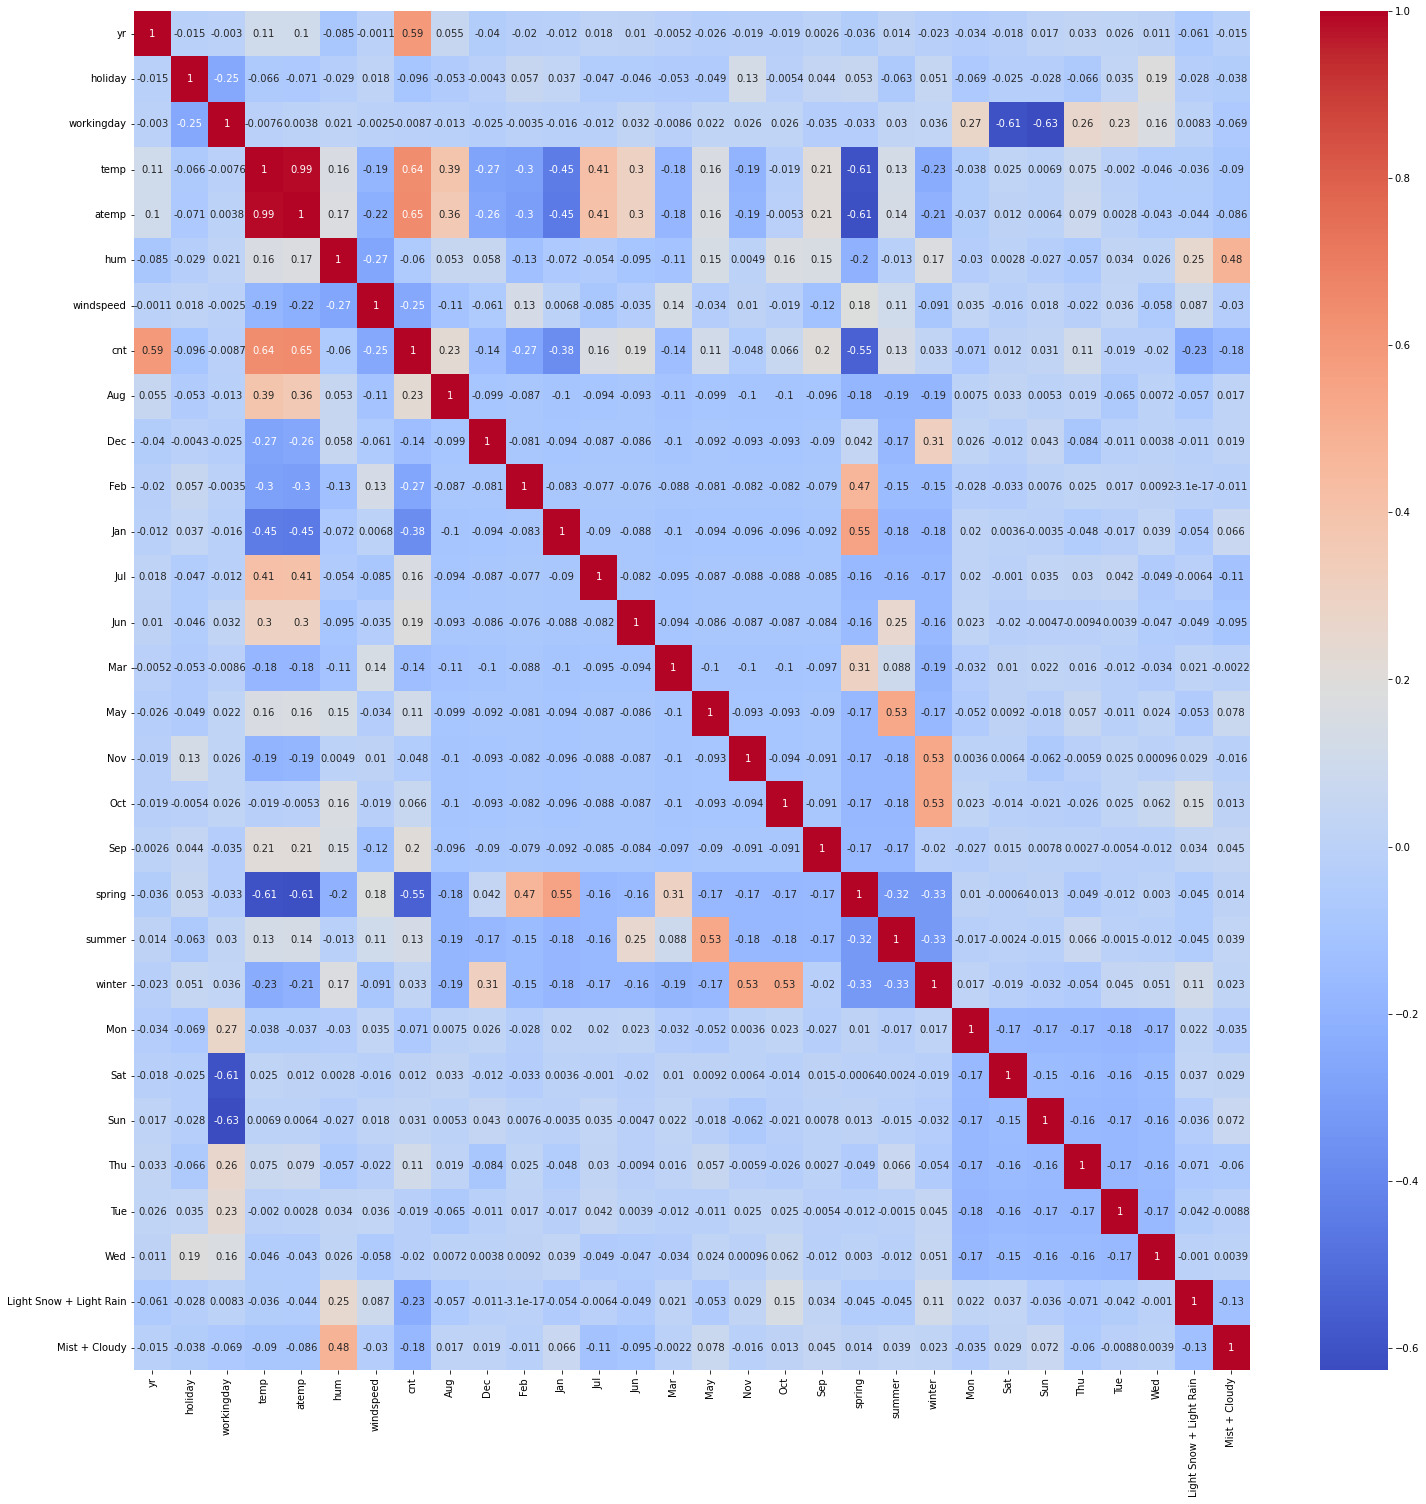

In [24]:
# Correlation coeficient to see highly correlated variables
plt.figure(figsize=(25,25))

sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

plt.show()

- The target variable `cnt` is highly corelated with `yr` and `temp`, `atemp` variables. 

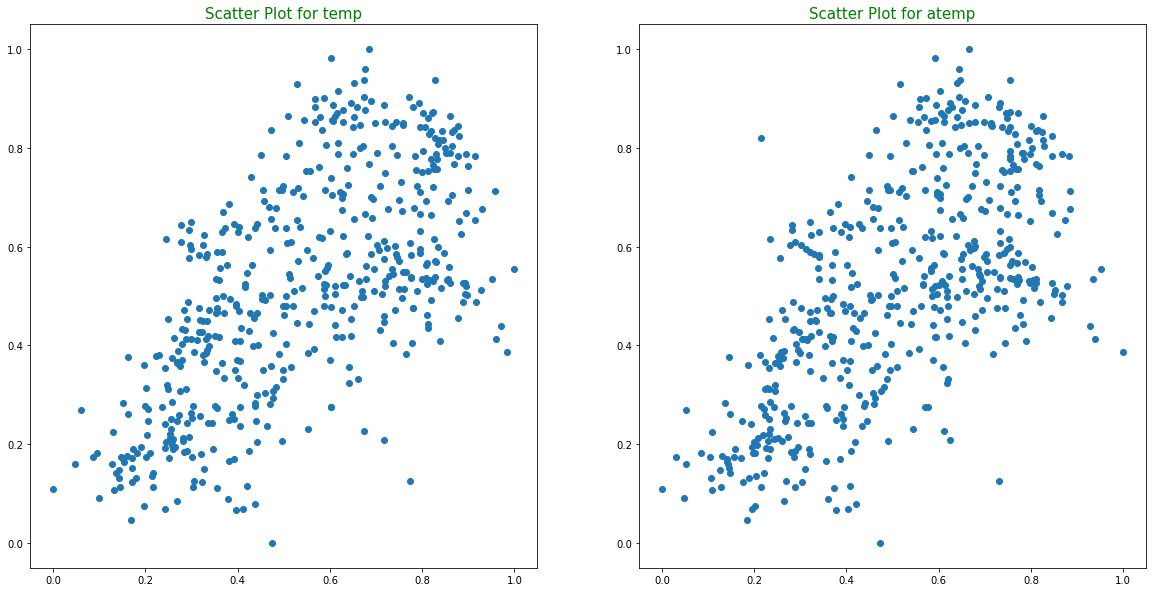

In [25]:
# relation of temp and cnt
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x = 'temp', y = 'cnt', data=df_train)
plt.title('Scatter Plot for temp',fontdict={'fontsize':15, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
plt.scatter(x = 'atemp', y = 'cnt', data=df_train)
plt.title('Scatter Plot for atemp',fontdict={'fontsize':15, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

# **5: Model Building**

In [26]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

Here I will be using the `statsmodels` for fitting the line.
For feature selection, balanced approch will be taken into considerations. First using RFE, 15 feature will be selected and then one by one feature will be droped to find the best model.

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow + Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [29]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [30]:
# assigning col variable for all the the selected variable
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'spring', 'summer', 'winter', 'Light Snow + Light Rain',
       'Mist + Cloudy'],
      dtype='object')

##### **Building model using statsmodel, for the detailed statistics**

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [34]:
#Let's see the summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.34e-189
Time:                        09:34:12   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3202      0.036      8.886      0.000       0.249       0.391
yr                          0.2303      0.008     28.511      0.000       0.214       0.246
holiday                    -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                        0.4800      0.037     12.977      0.000       0.407       0.553
hum                        -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                  -0.1885      0.026     -7.312      0.000      -0.239      -0.138
Dec                        -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan                        -0.0437      0.018     -2.415      0.016      -0.079      -0.008
Jul                        -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov                        -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep                         0.0749      0.017      4.438      0.000       0.042       0.108
spring                     -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer                      0.0408      0.015      2.659      0.008       0.011       0.071
winter                      0.1034      0.018      5.763      0.000       0.068       0.139
Light Snow + Light Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Mist + Cloudy              -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here all the variables have p-value less than 0.05. So we have to check varience influence factor(VIF) to confirm the model significance.

In [35]:
# Calculate the VIFs for the new model
def VIFCalculator(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
VIFCalculator(X_train_rfe)

,Features,VIF
0,const,82.48
11,spring,5.27
3,temp,4.42
13,winter,3.83
12,summer,2.76
4,hum,1.93
9,Nov,1.76
7,Jan,1.68
15,Mist + Cloudy,1.57
6,Dec,1.49


VIF score for spring variable has more than 5.27. So we drop the spring variable.

In [37]:
#Dropping spring column
X_train_new = X_train_rfe.drop(["spring"], axis=1)

In [38]:
# adding constant to new X_train
X_train_sm = sm.add_constant(X_train_new)

In [39]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_sm).fit()

In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.54e-188
Time:                        09:34:12   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2563      0.029      8.912      0.000       0.200       0.313
yr                          0.2289      0.008     28.178      0.000       0.213       0.245
holiday                    -0.0947      0.026     -3.680      0.000      -0.145      -0.044
temp                        0.5540      0.027     20.510      0.000       0.501       0.607
hum                        -0.1723      0.038     -4.553      0.000      -0.247      -0.098
windspeed                  -0.1969      0.026     -7.633      0.000      -0.248      -0.146
Dec                        -0.0312      0.017     -1.786      0.075      -0.066       0.003
Jan                        -0.0476      0.018     -2.613      0.009      -0.083      -0.012
Jul                        -0.0454      0.018     -2.520      0.012      -0.081      -0.010
Nov                        -0.0310      0.019     -1.674      0.095      -0.067       0.005
Sep                         0.0899      0.016      5.549      0.000       0.058       0.122
summer                      0.0716      0.011      6.423      0.000       0.050       0.094
winter                      0.1387      0.013     10.412      0.000       0.113       0.165
Light Snow + Light Rain    -0.2418      0.026     -9.125      0.000      -0.294      -0.190
Mist + Cloudy              -0.0530      0.010     -5.046      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now `Nov` has p-value more than 0.05.So we drop the `Nov` variable.

In [41]:
#Dropping spring column
X_train_new = X_train_new.drop(["Nov"], axis=1)

In [42]:
# adding constant to new X_train
X_train_sm = sm.add_constant(X_train_new)

In [43]:
# Running the linear model
lm2 = sm.OLS(y_train,X_train_sm).fit()

In [44]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          4.25e-189
Time:                        09:34:13   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2498      0.029      8.751      0.000       0.194       0.306
yr                          0.2290      0.008     28.131      0.000       0.213       0.245
holiday                    -0.0996      0.026     -3.887      0.000      -0.150      -0.049
temp                        0.5621      0.027     21.106      0.000       0.510       0.614
hum                        -0.1718      0.038     -4.530      0.000      -0.246      -0.097
windspeed                  -0.1969      0.026     -7.618      0.000      -0.248      -0.146
Dec                        -0.0201      0.016     -1.241      0.215      -0.052       0.012
Jan                        -0.0432      0.018     -2.392      0.017      -0.079      -0.008
Jul                        -0.0464      0.018     -2.572      0.010      -0.082      -0.011
Sep                         0.0927      0.016      5.745      0.000       0.061       0.124
summer                      0.0728      0.011      6.530      0.000       0.051       0.095
winter                      0.1275      0.012     11.062      0.000       0.105       0.150
Light Snow + Light Rain    -0.2392      0.026     -9.025      0.000      -0.291      -0.187
Mist + Cloudy              -0.0526      0.011     -5.002      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.484
Skew:                          -0.624   Prob(JB):                     2.28e-25
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`Dec` is insignificant in presence of other variables; can be dropped

In [45]:
#Dropping spring column
X_train_new = X_train_new.drop(["Dec"], axis=1)

In [46]:
# adding constant to new X_train
X_train_sm = sm.add_constant(X_train_new)

In [47]:
# Running the linear model
lm3 = sm.OLS(y_train,X_train_sm).fit()

In [48]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.03e-190
Time:                        09:34:13   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2444      0.028      8.658      0.000       0.189       0.300
yr                          0.2289      0.008     28.108      0.000       0.213       0.245
holiday                    -0.0986      0.026     -3.846      0.000      -0.149      -0.048
temp                        0.5717      0.025     22.422      0.000       0.522       0.622
hum                        -0.1764      0.038     -4.672      0.000      -0.251      -0.102
windspeed                  -0.1945      0.026     -7.541      0.000      -0.245      -0.144
Jan                        -0.0380      0.018     -2.164      0.031      -0.073      -0.003
Jul                        -0.0471      0.018     -2.612      0.009      -0.083      -0.012
Sep                         0.0941      0.016      5.846      0.000       0.062       0.126
summer                      0.0745      0.011      6.728      0.000       0.053       0.096
winter                      0.1258      0.011     10.986      0.000       0.103       0.148
Light Snow + Light Rain    -0.2362      0.026     -8.946      0.000      -0.288      -0.184
Mist + Cloudy              -0.0519      0.011     -4.938      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all values of P are less than 0.05. So we will check for multicolinearity by VIF.

In [49]:
VIFCalculator(X_train_new)

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
6,Jan,1.55
12,Mist + Cloudy,1.55
10,winter,1.53
7,Jul,1.43
9,summer,1.41
11,Light Snow + Light Rain,1.24
5,windspeed,1.19


So for this model, all the variables have P-values less than 0.05 which means these variables are statistically significant.Also multicolinearity among the variables is also in acceptable range.

In [50]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
VIFCalculator(X_train_new)

,Features,VIF
3,hum,18.42
2,temp,12.32
4,windspeed,3.60
11,Mist + Cloudy,2.13
0,yr,2.04
9,winter,1.97
8,summer,1.86
6,Jul,1.55
5,Jan,1.54
7,Sep,1.29


In [52]:
#Dropping spring column
X_train_new = X_train_new.drop(["hum"], axis=1)

In [53]:
# adding constant to new X_train
X_train_sm = sm.add_constant(X_train_new)

In [54]:
# Running the linear model
lm4 = sm.OLS(y_train,X_train_sm).fit()

In [55]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.63e-186
Time:                        09:34:13   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1481      0.020      7.522      0.000       0.109       0.187
yr                          0.2331      0.008     28.211      0.000       0.217       0.249
holiday                    -0.0994      0.026     -3.802      0.000      -0.151      -0.048
temp                        0.5408      0.025     21.516      0.000       0.491       0.590
windspeed                  -0.1615      0.025     -6.380      0.000      -0.211      -0.112
Jan                        -0.0442      0.018     -2.474      0.014      -0.079      -0.009
Jul                        -0.0398      0.018     -2.169      0.031      -0.076      -0.004
Sep                         0.0898      0.016      5.473      0.000       0.058       0.122
summer                      0.0722      0.011      6.396      0.000       0.050       0.094
winter                      0.1153      0.011     10.057      0.000       0.093       0.138
Light Snow + Light Rain    -0.2845      0.025    -11.465      0.000      -0.333      -0.236
Mist + Cloudy              -0.0798      0.009     -9.065      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       53.048   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.062
Skew:                          -0.609   Prob(JB):                     9.31e-24
Kurtosis:                       4.873   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model again
VIFCalculator(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,3.33
0,yr,2.04
7,summer,1.82
10,Mist + Cloudy,1.53
5,Jul,1.52
8,winter,1.51
6,Sep,1.29
4,Jan,1.22
9,Light Snow + Light Rain,1.08


## **Residual Analysis of the train data**
So, now to check if the error terms are also normally distributed. let's plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_cnt = lm4.predict(X_train_sm)

Text(0.5, 0, 'Errors')

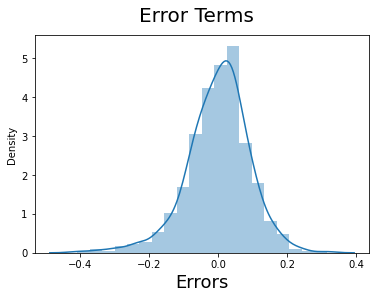

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Assign Title
fig.suptitle('Error Terms', fontsize = 20) 
# X=Label
plt.xlabel('Errors', fontsize = 18) 

From above graph, we can see error terms are normally distributed and mean is eqaul to zero

# 6: Making Predictions

In [59]:
# Create scaler object
scaler = MinMaxScaler()

# Applying scaler() to all columns to binary variables and categoical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Rescaling the features
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

# top 5 rows
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow + Light Rain,Mist + Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,1,0,0,1,0,0,0,0,0,0


**Dividing into X_test and y_test**

In [60]:
# Building the Linear Model
y_test = df_test.pop('cnt')
X_test= df_test

In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Making predictions
y_pred = lm4.predict(X_test_new)

In [63]:
from sklearn.metrics import r2_score
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred),3))

The R-Squared score of the model for the predicted values is 0.782


A R-Squared of 0.78 signifies that 78% of varience is explained by model.

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The Root Mean Squared Error of the model for the predicted values is',round(mse,3))

The Root Mean Squared Error of the model for the predicted values is 0.012


# 7: Model Evaluation

Text(0, 0.5, 'y_pred')

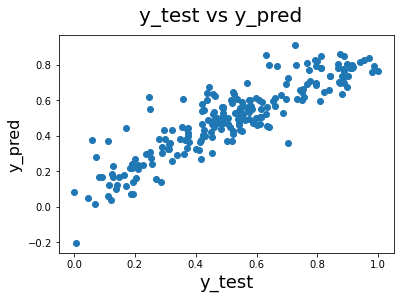

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
# Tittle
fig.suptitle('y_test vs y_pred', fontsize=20)    
 # X & Y labels
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [66]:
param = pd.DataFrame(lm4.params)
param.insert(0,'Features',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

,Features,Coefficient
index,,
3,temp,0.540788
1,yr,0.233087
0,const,0.148135
9,winter,0.115269
7,Sep,0.089779
8,summer,0.072212
6,Jul,-0.039785
5,Jan,-0.044248
11,Mist + Cloudy,-0.079840


The equation of best fitted line is :  
**cnt = 0.1481 + 0.54xtemp + 0.23xyr + 0.11xwinter + 0.09xSep + 0.07xsummer - 0.04xJul - 0.04xJan - 0.08x(Mist+cloudy) - 0.1xholiday - 0.16xwindspeed - 0.28x(Light Snow+Light Rain)**

There is high demand in summer, Boombikes should increase the availability of the bikes in the summer on good weather days and hotter temperature to increse the revenue.